### USA: 10Y Yield vs Inflation (funciona con "country|date|inflation_annual%")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
# ---- Leer data limpia exportado en el archivo 1_cleansing.ipynb ----
df_clean = pd.read_csv("data/clean_data/clean_code.csv")

In [3]:
# Chequeo rápido de los datos estan leidos bien
df_clean.head()

,Year,yield_10y,inflation_yoy,real_yield
0,1962,3.946064,1.198773,2.747291
1,1963,4.001566,1.239669,2.761897
2,1964,4.187360,1.278912,2.908448
3,1965,4.283695,1.585169,2.698526
4,1966,4.925040,3.015075,1.909965


###  Paso 3: Chequeo rápido

In [4]:
print("\nÚltimos años limpios:")
print(df_clean.tail(10))


Últimos años limpios:
    Year  yield_10y  inflation_yoy  real_yield
51  2013   2.350160       1.464833    0.885327
52  2014   2.539560       1.622223    0.917337
53  2015   2.138287       0.118627    2.019660
54  2016   1.837440       1.261583    0.575857
55  2017   2.329480       2.130110    0.199370
56  2018   2.911245       2.442583    0.468662
57  2019   2.141400       1.812210    0.329190
58  2020   0.889203       1.233584   -0.344381
59  2021   1.446853       4.697859   -3.251006
60  2022   2.950562       8.002800   -5.052238


### Paso 4: Visualización post-limpieza

In [5]:
print(df_clean.columns.tolist())
print(df_clean.head())

['Year', 'yield_10y', 'inflation_yoy', 'real_yield']
   Year  yield_10y  inflation_yoy  real_yield
0  1962   3.946064       1.198773    2.747291
1  1963   4.001566       1.239669    2.761897
2  1964   4.187360       1.278912    2.908448
3  1965   4.283695       1.585169    2.698526
4  1966   4.925040       3.015075    1.909965


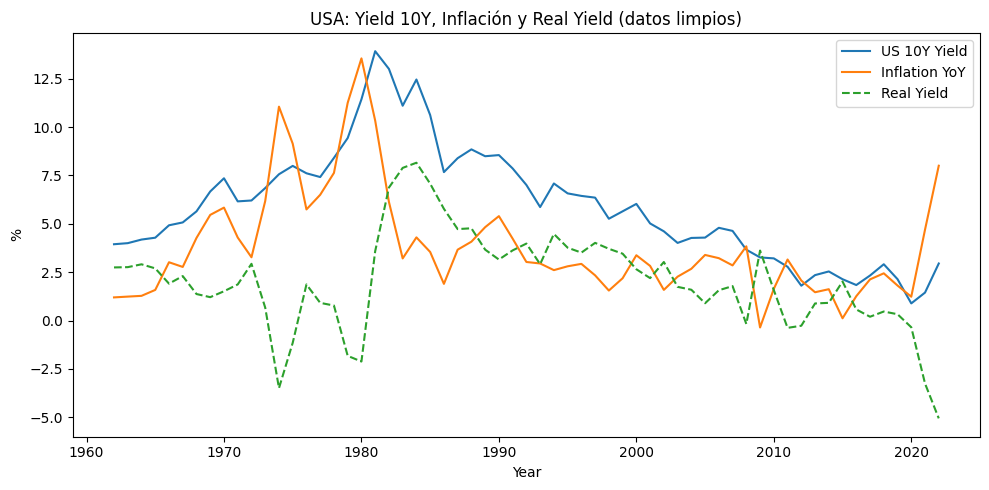

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df_clean["Year"], df_clean["yield_10y"], label="US 10Y Yield")
plt.plot(df_clean["Year"], df_clean["inflation_yoy"], label="Inflation YoY")
plt.plot(df_clean["Year"], df_clean["real_yield"], label="Real Yield", linestyle="--")
plt.title("USA: Yield 10Y, Inflación y Real Yield (datos limpios)")
plt.xlabel("Year")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()

### Interpretación rápida del gráfico

Años 70s – 80s:

La inflación se dispara (choques del petróleo).

Los rendimientos nominales (azul) también suben fuerte.

El rendimiento real (verde) se mantiene positivo pero muy volátil.

Años 90s – 2000s:

Inflación baja y estable (2–3%).

Yield nominal cae gradualmente.

El rendimiento real es bajo pero estable.

2010s en adelante:

Rendimientos muy bajos (política monetaria expansiva).

Inflación estable… hasta el repunte 2021–2022.

En 2021–2022 el real yield se hace negativo (bonos pierden contra inflación).

#### Qué significa:

Cuando el real yield es positivo → los bonos dan un retorno por encima de la inflación (buen refugio).

Cuando el real yield es negativo → los inversores pierden poder adquisitivo aunque inviertan en bonos.

#### Correlación con datos limpios


In [7]:
print("\n--- Correlación simple (datos limpios) ---")
print(df_clean[["yield_10y", "inflation_yoy"]].corr())


--- Correlación simple (datos limpios) ---
               yield_10y  inflation_yoy
yield_10y       1.000000       0.616816
inflation_yoy   0.616816       1.000000


#### Regresión lineal simple (datos limpios)


In [8]:
X = df_clean[["inflation_yoy"]]
y = df_clean["yield_10y"]

# Agregar constante al modelo
X = sm.add_constant(X)

model_clean = sm.OLS(y, X).fit()
print("\n--- Regresión lineal simple (datos limpios) ---")
print(model_clean.summary())


--- Regresión lineal simple (datos limpios) ---
                            OLS Regression Results                            
Dep. Variable:              yield_10y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     36.23
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.20e-07
Time:                        00:10:30   Log-Likelihood:                -137.94
No. Observations:                  61   AIC:                             279.9
Df Residuals:                      59   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Interpretación del output de la regresión lineal:

Coeficientes (const y inflación)

Constante (const = 3.3783) → cuando la inflación es 0, el rendimiento de los bonos a 10 años tiende a estar en torno al 3.38%.

Inflación (0.6571) → por cada +1% en inflación, el yield sube en promedio +0.66 puntos porcentuales. Esto confirma una relación positiva clara.

R² (0.380)

El 38% de la variabilidad del rendimiento de los bonos a 10 años se explica por la inflación.

Esto significa que la inflación influye mucho, pero no lo explica todo (hay otros factores: política monetaria, expectativas, prima de riesgo, etc.).

p-values

Ambos coeficientes (constante e inflación) tienen p < 0.001, es decir, son estadísticamente significativos.

La relación no es casualidad: hay evidencia fuerte de que la inflación impacta en el yield.

Durbin-Watson (0.227)

Valor bajo → indica que puede haber autocorrelación en los errores (normal en series temporales).

Esto nos dice que quizá más adelante necesitemos un modelo de series temporales (ARIMA, VAR) o un modelo con variables adicionales.

#### Conclusión rápida proyecto
👉 Existe una relación positiva y estadísticamente significativa entre la inflación y el rendimiento del bono USA 10Y: cuando la inflación sube, el yield también sube, aunque la inflación explica solo un 38% de la variación.

### ispersión inflación vs yield con la recta de regresión

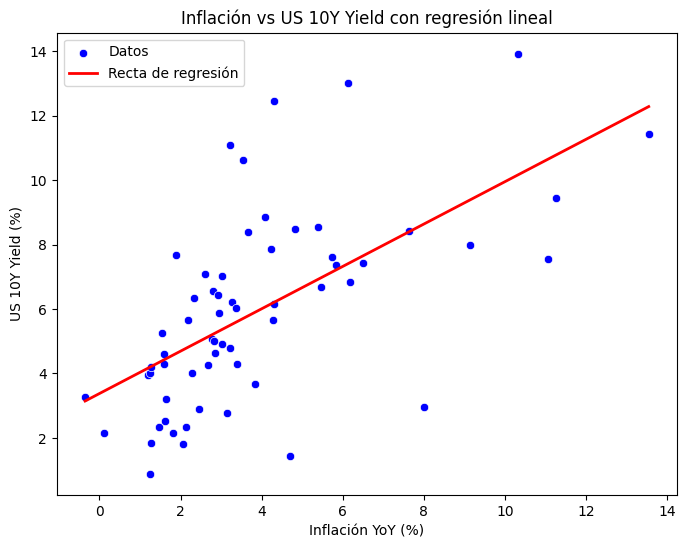

In [9]:
# Scatter plot con la recta de regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x="inflation_yoy", y="yield_10y", data=df_clean, color="blue", label="Datos")

# Ajustar la recta
coef = 0.6571
intercept = 3.3783
x_vals = np.linspace(df_clean["inflation_yoy"].min(), df_clean["inflation_yoy"].max(), 100)
y_vals = intercept + coef * x_vals
plt.plot(x_vals, y_vals, color="red", linewidth=2, label="Recta de regresión")

# Títulos
plt.title("Inflación vs US 10Y Yield con regresión lineal")
plt.xlabel("Inflación YoY (%)")
plt.ylabel("US 10Y Yield (%)")
plt.legend()
plt.show()

### ecuación y el R²

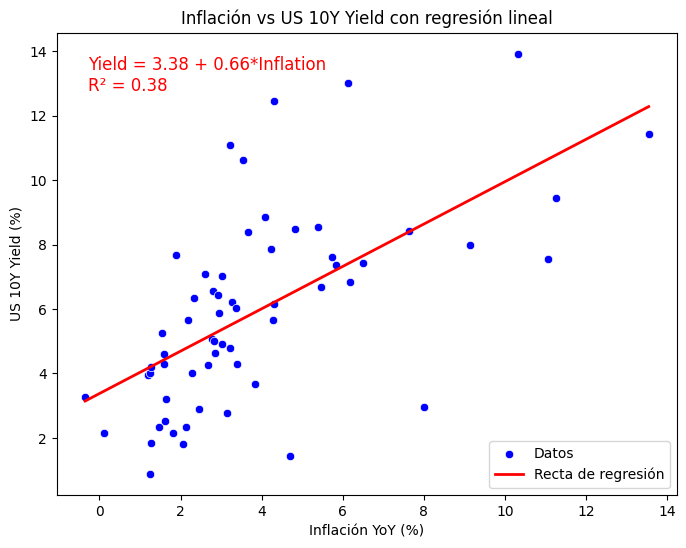

In [10]:
# Scatter plot con recta de regresión y ecuación
plt.figure(figsize=(8,6))
sns.scatterplot(x="inflation_yoy", y="yield_10y", data=df_clean, color="blue", label="Datos")

# Recta de regresión
coef = 0.6571
intercept = 3.3783
r2 = 0.38  # R-cuadrado de tu modelo
x_vals = np.linspace(df_clean["inflation_yoy"].min(), df_clean["inflation_yoy"].max(), 100)
y_vals = intercept + coef * x_vals
plt.plot(x_vals, y_vals, color="red", linewidth=2, label="Recta de regresión")

# Texto con ecuación
plt.text(0.05, 0.95,
         f"Yield = {intercept:.2f} + {coef:.2f}*Inflation\nR² = {r2:.2f}",
         transform=plt.gca().transAxes,
         fontsize=12, color="red", verticalalignment="top")

# Títulos y etiquetas
plt.title("Inflación vs US 10Y Yield con regresión lineal")
plt.xlabel("Inflación YoY (%)")
plt.ylabel("US 10Y Yield (%)")
plt.legend()
plt.show()

### Diagnóstico del modelo (OLS)


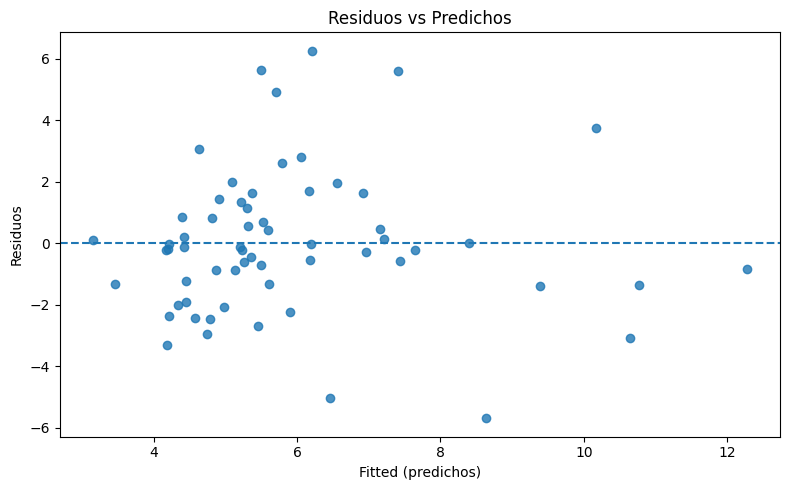

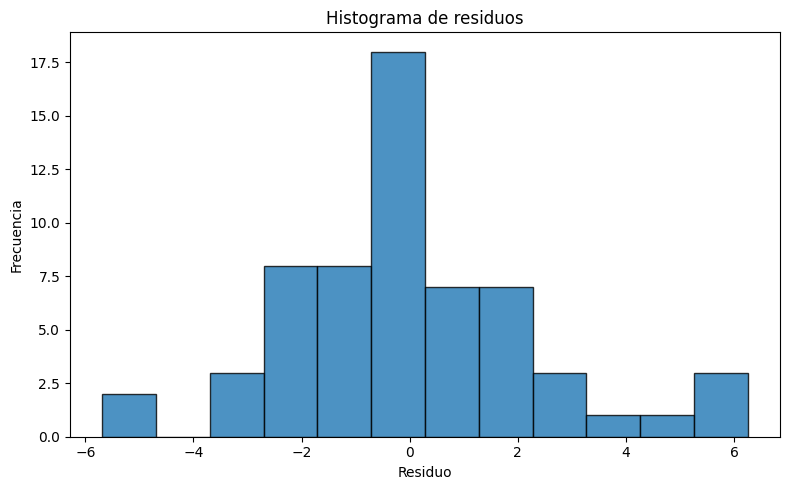

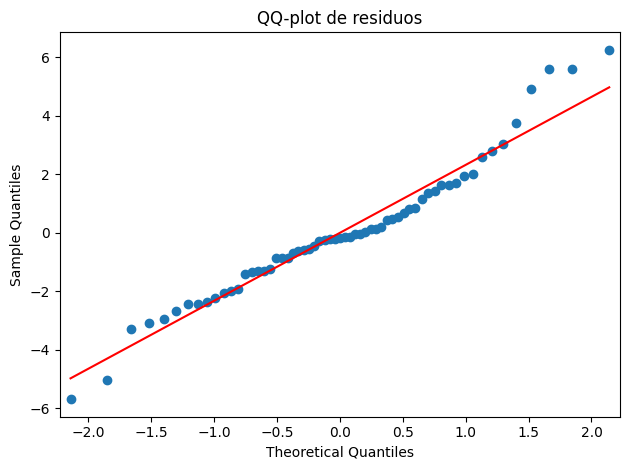

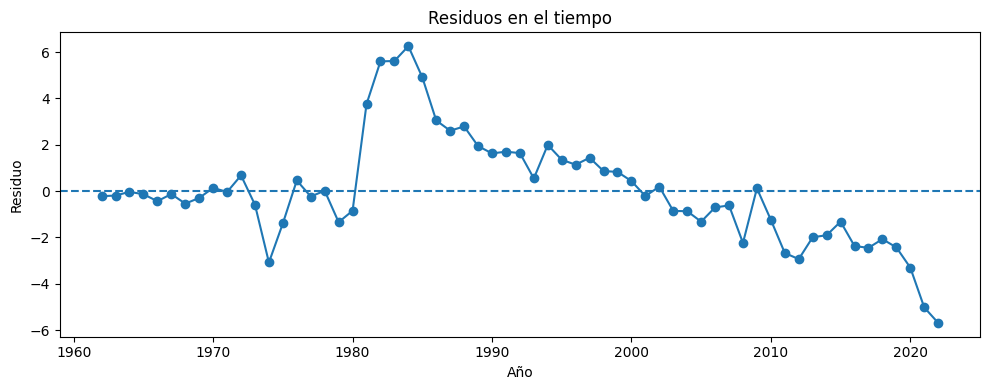


--- Tests de diagnóstico ---
Jarque-Bera: stat=3.936, p-value=0.1397  (skew=0.474, kurt=3.805)
Breusch-Pagan: stat=1.790, p-value=0.1809

Ljung-Box (p-values):
lag1     2.083919e-11
lag4     4.153785e-23
lag8     4.451972e-27
lag12    2.479677e-26
Name: lb_pvalue, dtype: float64

Durbin-Watson: 0.227


In [11]:
# 1) Recalcular (por si abriste sesión nueva)
X = sm.add_constant(df_clean[["inflation_yoy"]])
y = df_clean["yield_10y"]
model_clean = sm.OLS(y, X).fit()

# 2) Residuales y ajustados
fitted = model_clean.fittedvalues
resid   = model_clean.resid
std_res = (resid - resid.mean()) / resid.std(ddof=1)

# 3) Plots básicos
plt.figure(figsize=(8,5))
plt.scatter(fitted, resid, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted (predichos)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predichos")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.hist(resid, bins=12, edgecolor="k", alpha=0.8)
plt.title("Histograma de residuos")
plt.xlabel("Residuo"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

sm.qqplot(resid, line="s")
plt.title("QQ-plot de residuos")
plt.tight_layout(); plt.show()

# Residuos a lo largo del tiempo (para ver autocorrelación visual)
plt.figure(figsize=(10,4))
plt.plot(df_clean["Year"], resid, marker="o")
plt.axhline(0, linestyle="--")
plt.title("Residuos en el tiempo")
plt.xlabel("Año"); plt.ylabel("Residuo")
plt.tight_layout(); plt.show()

# 4) Tests estadísticos
print("\n--- Tests de diagnóstico ---")

# Normalidad (Jarque–Bera)
try:
    # statsmodels siempre devuelve (jb, pvalue, skew, kurtosis)
    from statsmodels.stats.stattools import jarque_bera as sm_jb
    jb_stat, jb_p, jb_skew, jb_kurt = sm_jb(resid)
except Exception:
    # fallback: SciPy (puede devolver solo 2 valores)
    from scipy import stats
    jb = stats.jarque_bera(resid)
    if hasattr(jb, "__len__") and len(jb) >= 2:
        jb_stat, jb_p = jb[0], jb[1]
        jb_skew = jb_kurt = float("nan")
    else:
        jb_stat = float(jb)
        jb_p = float("nan")
        jb_skew = jb_kurt = float("nan")
print(f"Jarque-Bera: stat={jb_stat:.3f}, p-value={jb_p:.4f}  (skew={jb_skew:.3f}, kurt={jb_kurt:.3f})")

# Heterocedasticidad (Breusch–Pagan)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_stat, bp_p, _, _ = het_breuschpagan(resid, X)
print(f"Breusch-Pagan: stat={bp_stat:.3f}, p-value={bp_p:.4f}")

# Autocorrelación en residuos (Ljung–Box)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(resid, lags=[1, 4, 8, 12], return_df=True)
print("\nLjung-Box (p-values):")
print(lb["lb_pvalue"].rename(index={1:"lag1",4:"lag4",8:"lag8",12:"lag12"}))

# Durbin–Watson
from statsmodels.stats.stattools import durbin_watson
print(f"\nDurbin-Watson: {durbin_watson(resid):.3f}")

#### 1. Normalidad de los residuos (Jarque–Bera)

JB = 3.936, p-value = 0.1397

Como p > 0.05 → no rechazamos la hipótesis nula de normalidad.
✅ Los residuos son aproximadamente normales → buen síntoma.

2. Heterocedasticidad (Breusch–Pagan)

BP = 1.790, p-value = 0.1809

Como p > 0.05 → no hay evidencia fuerte de heterocedasticidad.
✅ La varianza de los errores parece estable → los errores estándar son confiables.

3. Autocorrelación (Ljung–Box + Durbin-Watson)

Ljung–Box:

lag1, lag4, lag8, lag12 → p-values casi cero → rechazamos la hipótesis de “no autocorrelación”.
❌ Hay autocorrelación muy fuerte en los residuos.

Durbin–Watson = 0.227

Valores cercanos a 2 = no autocorrelación.

Valores < 1 = fuerte autocorrelación positiva.

Aquí 0.227 → autocorrelación positiva extrema.

#### En resumen:

Normalidad: bien.

Homocedasticidad: bien.

Autocorrelación: muy mal → el modelo lineal clásico OLS no captura la dinámica temporal.

👉 Esto significa que tu modelo simple (Yield ~ Inflación) ignora la dependencia temporal. Los rendimientos de bonos son series temporales, por eso los residuos siguen un patrón.

#### Reestimación con errores robustos HAC (Newey-West)

In [12]:
X = sm.add_constant(df_clean[["inflation_yoy"]])
y = df_clean["yield_10y"]

# Modelo OLS
ols_model = sm.OLS(y, X).fit()

# Ajuste con errores robustos HAC (Newey-West)
# lag=4 (aprox. autocorrelación hasta 4 rezagos, puedes probar otros valores)
nw_model = ols_model.get_robustcov_results(cov_type="HAC", maxlags=4)

print("\n--- Regresión OLS con errores HAC (Newey-West) ---")
print(nw_model.summary())



--- Regresión OLS con errores HAC (Newey-West) ---
                            OLS Regression Results                            
Dep. Variable:              yield_10y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     32.46
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           4.09e-07
Time:                        00:10:30   Log-Likelihood:                -137.94
No. Observations:                  61   AIC:                             279.9
Df Residuals:                      59   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

 

#### 👉 ¿Qué cambió con HAC?

Coeficientes (constante = 3.37, inflación = 0.65) → no cambiaron, porque la relación base sigue siendo la misma.

Errores estándar (y por tanto t-stats y p-values) → son más grandes que antes (ej. la constante pasó de std=0.51 a 0.69).

Pero siguen siendo muy significativos (p<0.001) → conclusión: la relación inflación → yield sigue siendo estadísticamente fuerte.

Ahora los intervalos de confianza son más realistas, porque tienen en cuenta la autocorrelación.

✅ En resumen: ya tienemos un modelo lineal robusto que muestra que por cada +1% de inflación, el rendimiento a 10 años sube ~0.65% en promedio, con bastante confianza.